
# importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
#--loading the data from csv file to pandas datafram
price = pd.read_csv('house price.csv')
price.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [79]:
price.shape

(33656, 19)

In [47]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [48]:
{column: len(price[column].unique())for column in price.select_dtypes('object').columns}

{'ADDRESS': 33566,
 'SUBURB': 321,
 'NEAREST_STN': 68,
 'DATE_SOLD': 350,
 'NEAREST_SCH': 160}

# Preparing the data
I'll only work with numeric data, so I'll drop some columns of the dataframe

In [80]:
df = price.copy()

In [81]:
df.drop(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], axis=1,inplace =True)

Let's see how it is now


In [93]:
price.shape, df.shape,

((33656, 19), (33656, 14))

In [94]:
df.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,565000,4,2,2.0,600,160,2003.0,18300,1800,6164,-32.115900,115.842450,0.828339,NaN
1,365000,3,2,2.0,351,139,2013.0,26900,4900,6167,-32.193470,115.859554,5.524324,129.0
2,287000,3,1,1.0,719,86,1979.0,22600,1900,6111,-32.120578,115.993579,1.649178,113.0
3,255000,2,1,2.0,651,59,1953.0,17900,3600,6056,-31.900547,116.038009,1.571401,NaN
4,325000,4,1,2.0,466,131,1998.0,11200,2000,6054,-31.885790,115.947780,1.514922,NaN


I see some NaN values on the last column.

Let's see how many NaN are there and in which columns in the next step.

# Cleanig the data
Some values are NaN. Let's check where

<AxesSubplot:>

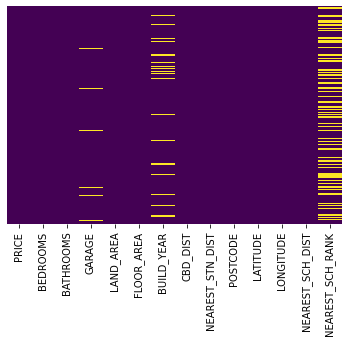

In [101]:
sns.heatmap(df.isnull(),
            cbar=False, yticklabels=False, cmap='viridis')

The yellow marks are NaN. There are a lot of missing values in the last column. I'll just remove that column entirely.

In [105]:
df.drop(['NEAREST_SCH_RANK'], axis = 1, inplace = True)

Now Let's see how it is now

<AxesSubplot:>

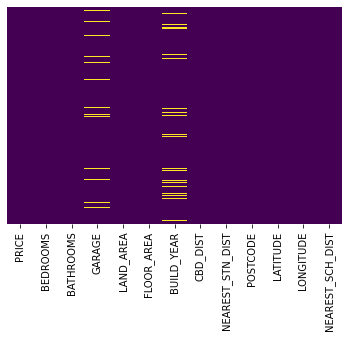

In [118]:
sns.heatmap(df.isnull(),

            cbar=False, yticklabels = False , cmap = 'viridis')

To simplify things, I'll remove every row that has at least one missing field.

In [119]:
df = df.dropna()

In [124]:
df.isna().sum()

PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH_DIST    0
dtype: int64

# Traning

Now I'll train a linear regression model based on the data I just cleaned..

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [277]:
model = LinearRegression()

In [155]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X , y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [279]:
X_train

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
20435,4,2,2.0,356,138,2013.0,22500,956,6111,-32.113260,116.003341,1.039309
32356,4,2,2.0,632,211,2003.0,33000,1600,6167,-32.248260,115.850157,1.246366
11483,4,2,4.0,20000,218,2011.0,36300,21900,6082,-31.875871,116.232117,1.155603
21433,3,1,2.0,728,130,1969.0,12900,4200,6029,-31.870087,115.763204,0.817775
32559,4,2,2.0,756,230,1976.0,12800,2700,6018,-31.861722,115.775981,0.970493
...,...,...,...,...,...,...,...,...,...,...,...,...
24558,3,2,3.0,894,110,1991.0,39200,15100,6123,-32.287320,115.986250,2.020655
25823,3,2,1.0,247,114,2005.0,7000,3800,6104,-31.945806,115.932865,1.462983
6060,1,3,2.0,401,290,2011.0,10500,2400,6018,-31.883272,115.783462,1.770888
32527,5,2,2.0,460,131,2003.0,27800,1700,6112,-32.168310,116.006830,1.034922


In [280]:
y_train

20435     280000
32356     429000
11483     775000
21433     821000
32559     600000
          ...   
24558     420000
25823     375000
6060     1250000
32527     249000
21544     310000
Name: PRICE, Length: 21192, dtype: int64

In [281]:
model.fit(X_train, y_train)

LinearRegression()

In [282]:
model.coef_

array([-9.58057577e+03,  1.00938194e+05,  1.15536914e+04,  1.18927883e+00,
        2.38718861e+03, -3.99853064e+03, -1.43154546e+01,  1.60021102e+01,
       -8.15662275e+02, -3.86041106e+05, -9.74351131e+05,  1.73794209e+04])

# Predicting
Now that the model is trained, let's start making predictions.

In [283]:
predicted_values = model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

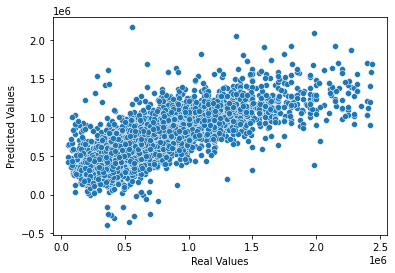

In [284]:
sns.scatterplot(x=y_test, y = predicted_values)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')


# Evaluating

In [285]:
from sklearn import metrics

In [286]:
print('MAE: ', metrics.mean_absolute_error(y_test, predicted_values))
print('MSE: ', metrics.mean_squared_error(y_test, predicted_values))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

MAE:  153388.43545172756
MSE:  51165842478.34304
RMSE:  226198.67921440885


In [287]:
metrics.explained_variance_score(y_test, predicted_values)

0.5987859093142769

# Residuals

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

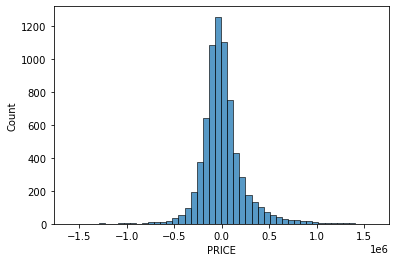

In [291]:
sns.histplot(data=(y_test-predicted_values), bins=50)

# Conclusion

In [297]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
coefficients

,Coefficients
BEDROOMS,-11354.651413
BATHROOMS,111840.033959
GARAGE,8740.407509
LAND_AREA,1.242715
FLOOR_AREA,2392.024058
BUILD_YEAR,-4108.071265
CBD_DIST,-14.397652
NEAREST_STN_DIST,15.811924
POSTCODE,-854.240207
LATITUDE,-399099.530182


In [308]:
model.predict([[10,20,25,30,35,40,45,50,55,60,65,70]])

G:\downloads\New folder (2)\New folder (2)\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([29560656.46874408])